<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Обзор-файлов-и-данных-в-них" data-toc-modified-id="Обзор-файлов-и-данных-в-них-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Обзор файлов и данных в них</a></span></li><li><span><a href="#Проверка-эффективности-обогощения" data-toc-modified-id="Проверка-эффективности-обогощения-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка эффективности обогощения</a></span></li><li><span><a href="#Анализ-признаков-недоступных-в-тестовой-выборке" data-toc-modified-id="Анализ-признаков-недоступных-в-тестовой-выборке-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Анализ признаков недоступных в тестовой выборке</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Работа-с-пропусками" data-toc-modified-id="Работа-с-пропусками-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Работа с пропусками</a></span></li><li><span><a href="#Работа-с-дубликатами" data-toc-modified-id="Работа-с-дубликатами-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Работа с дубликатами</a></span></li></ul></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Концентрация-металлов-на-различных-этапах-очистки" data-toc-modified-id="Концентрация-металлов-на-различных-этапах-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Концентрация металлов на различных этапах очистки</a></span></li><li><span><a href="#Сравнения-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках" data-toc-modified-id="Сравнения-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравнения распределения размеров гранул сырья на обучающей и тестовой выборках</a></span></li><li><span><a href="#Суммарная-концентрация-всех-веществ-на-разных-стадиях" data-toc-modified-id="Суммарная-концентрация-всех-веществ-на-разных-стадиях-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Суммарная концентрация всех веществ на разных стадиях</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

## Подготовка данных

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge,Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
import warnings

warnings.filterwarnings('ignore')

from sklearn.dummy import DummyRegressor

### Обзор файлов и данных в них

In [ ]:
df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

pd.set_option('display.max_columns', None)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


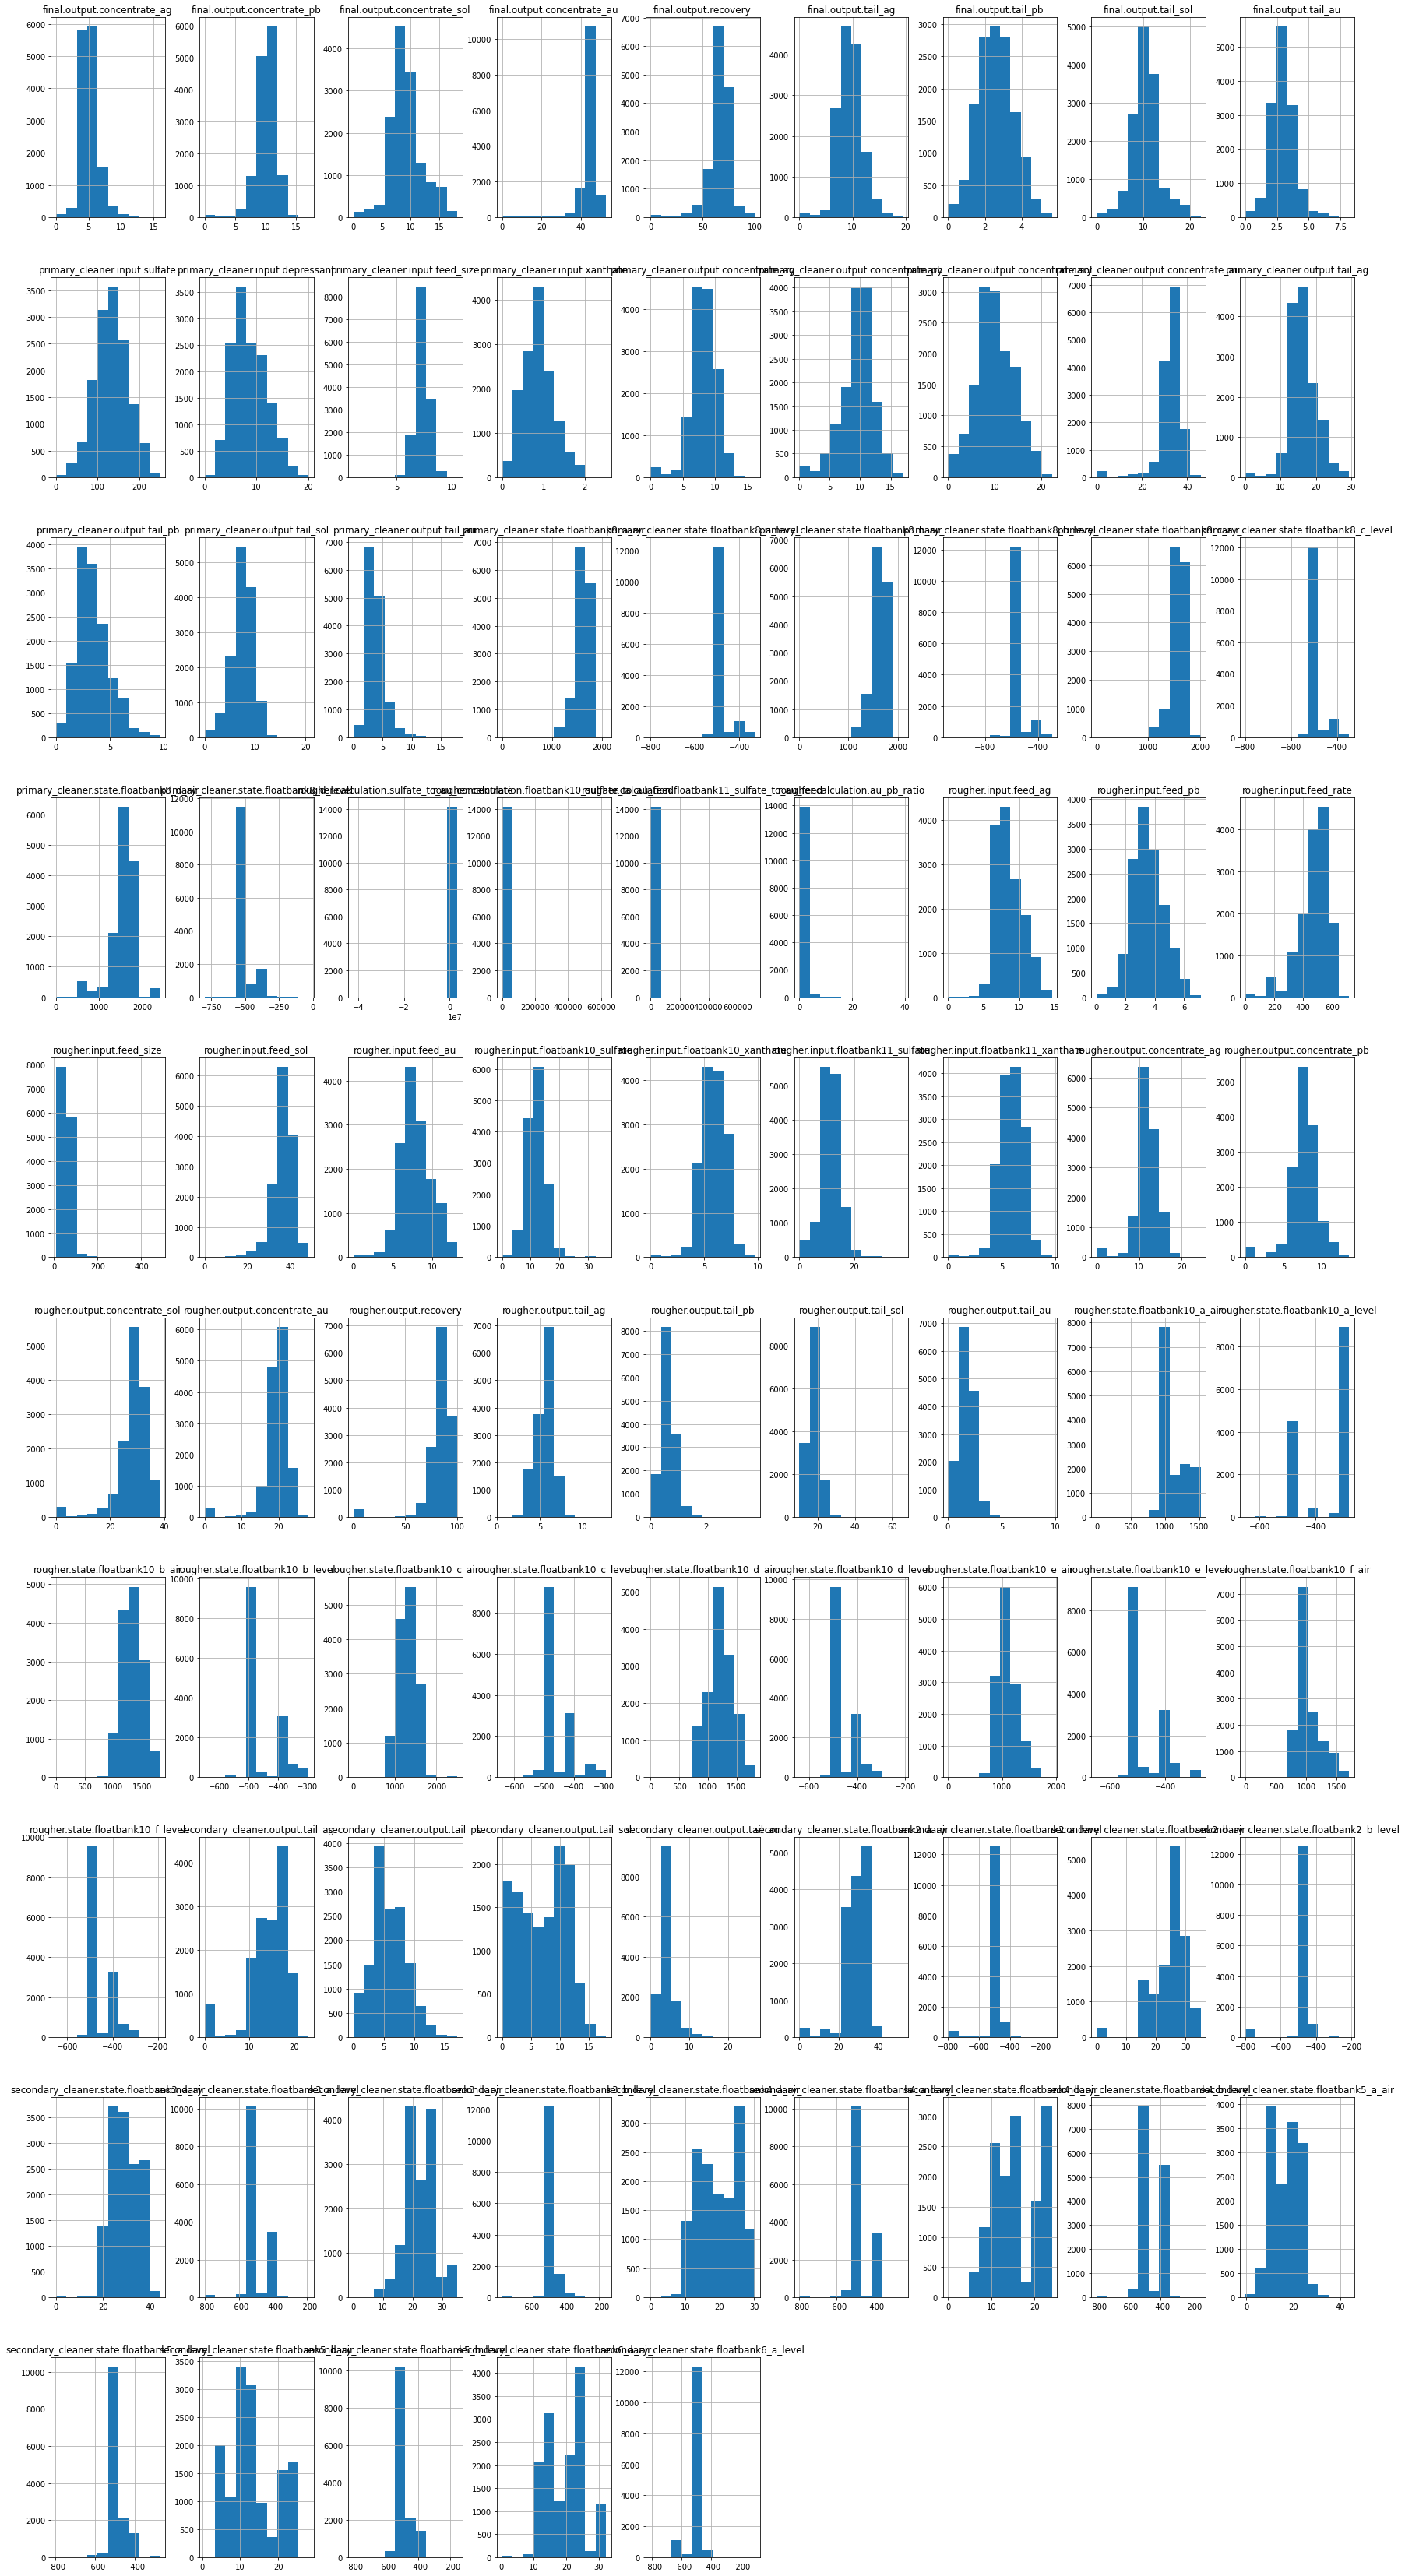

In [ ]:
display(df_train.head())
df_train.info()
df_train.hist(figsize=(30, 60));

В файле с обучающей выборкой содержатся чуть больше 14 000 записей вместе с целевым признаком. Их описывают 87 колонок, 86 из которых численные признаки и один содержит дату. В данных содержатся пропуски. Так как он представляют незначительную часть от общего размера данных, во избежания ошибок при попытке их заполнения пропуски лучше удалить.

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289,1250.493702,-399.746728,1199.398691,-397.50

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

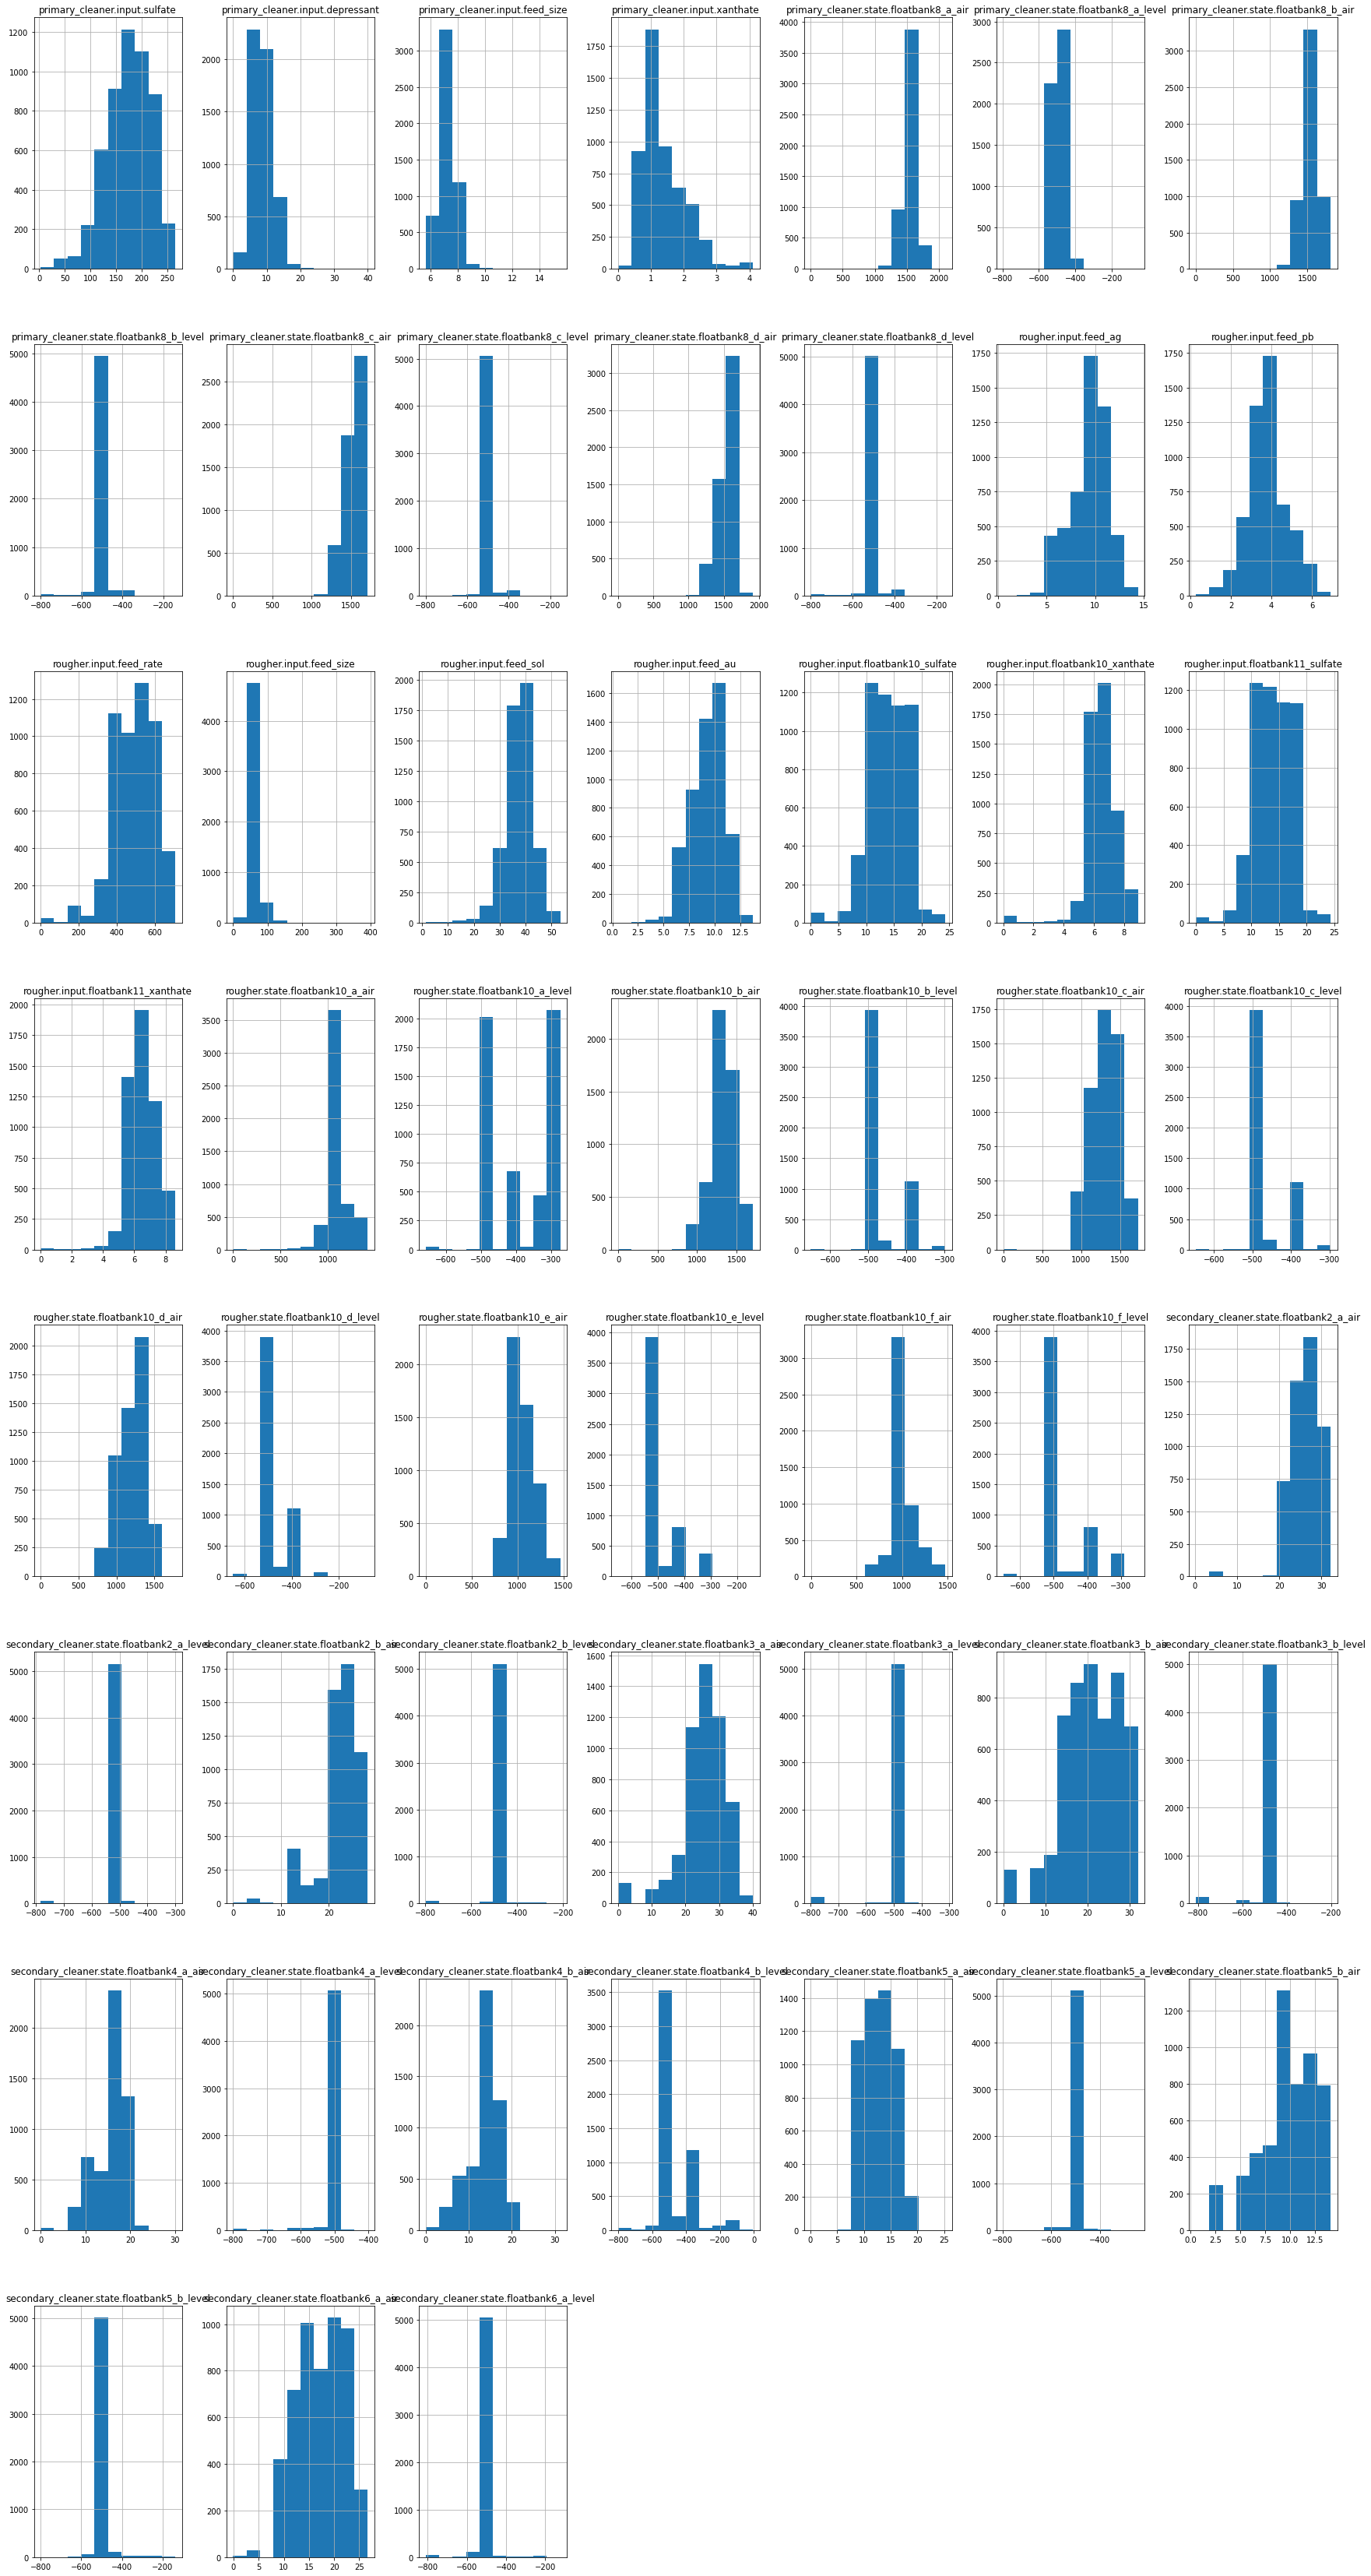

In [ ]:
display(df_test.head())
df_test.info()
df_test.hist(figsize=(30, 60));

В файле с тестовой выборкой содержатся почти 5 300 записей без целевого признака, который в дальнейшем необходимо будет восстановить из общего файла. данные описывают 53 колонки, 52 из которых численные признаки и один содержит дату. Данны также как и обучающая выборка содержат пропуски, которые необходимо удалить.

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


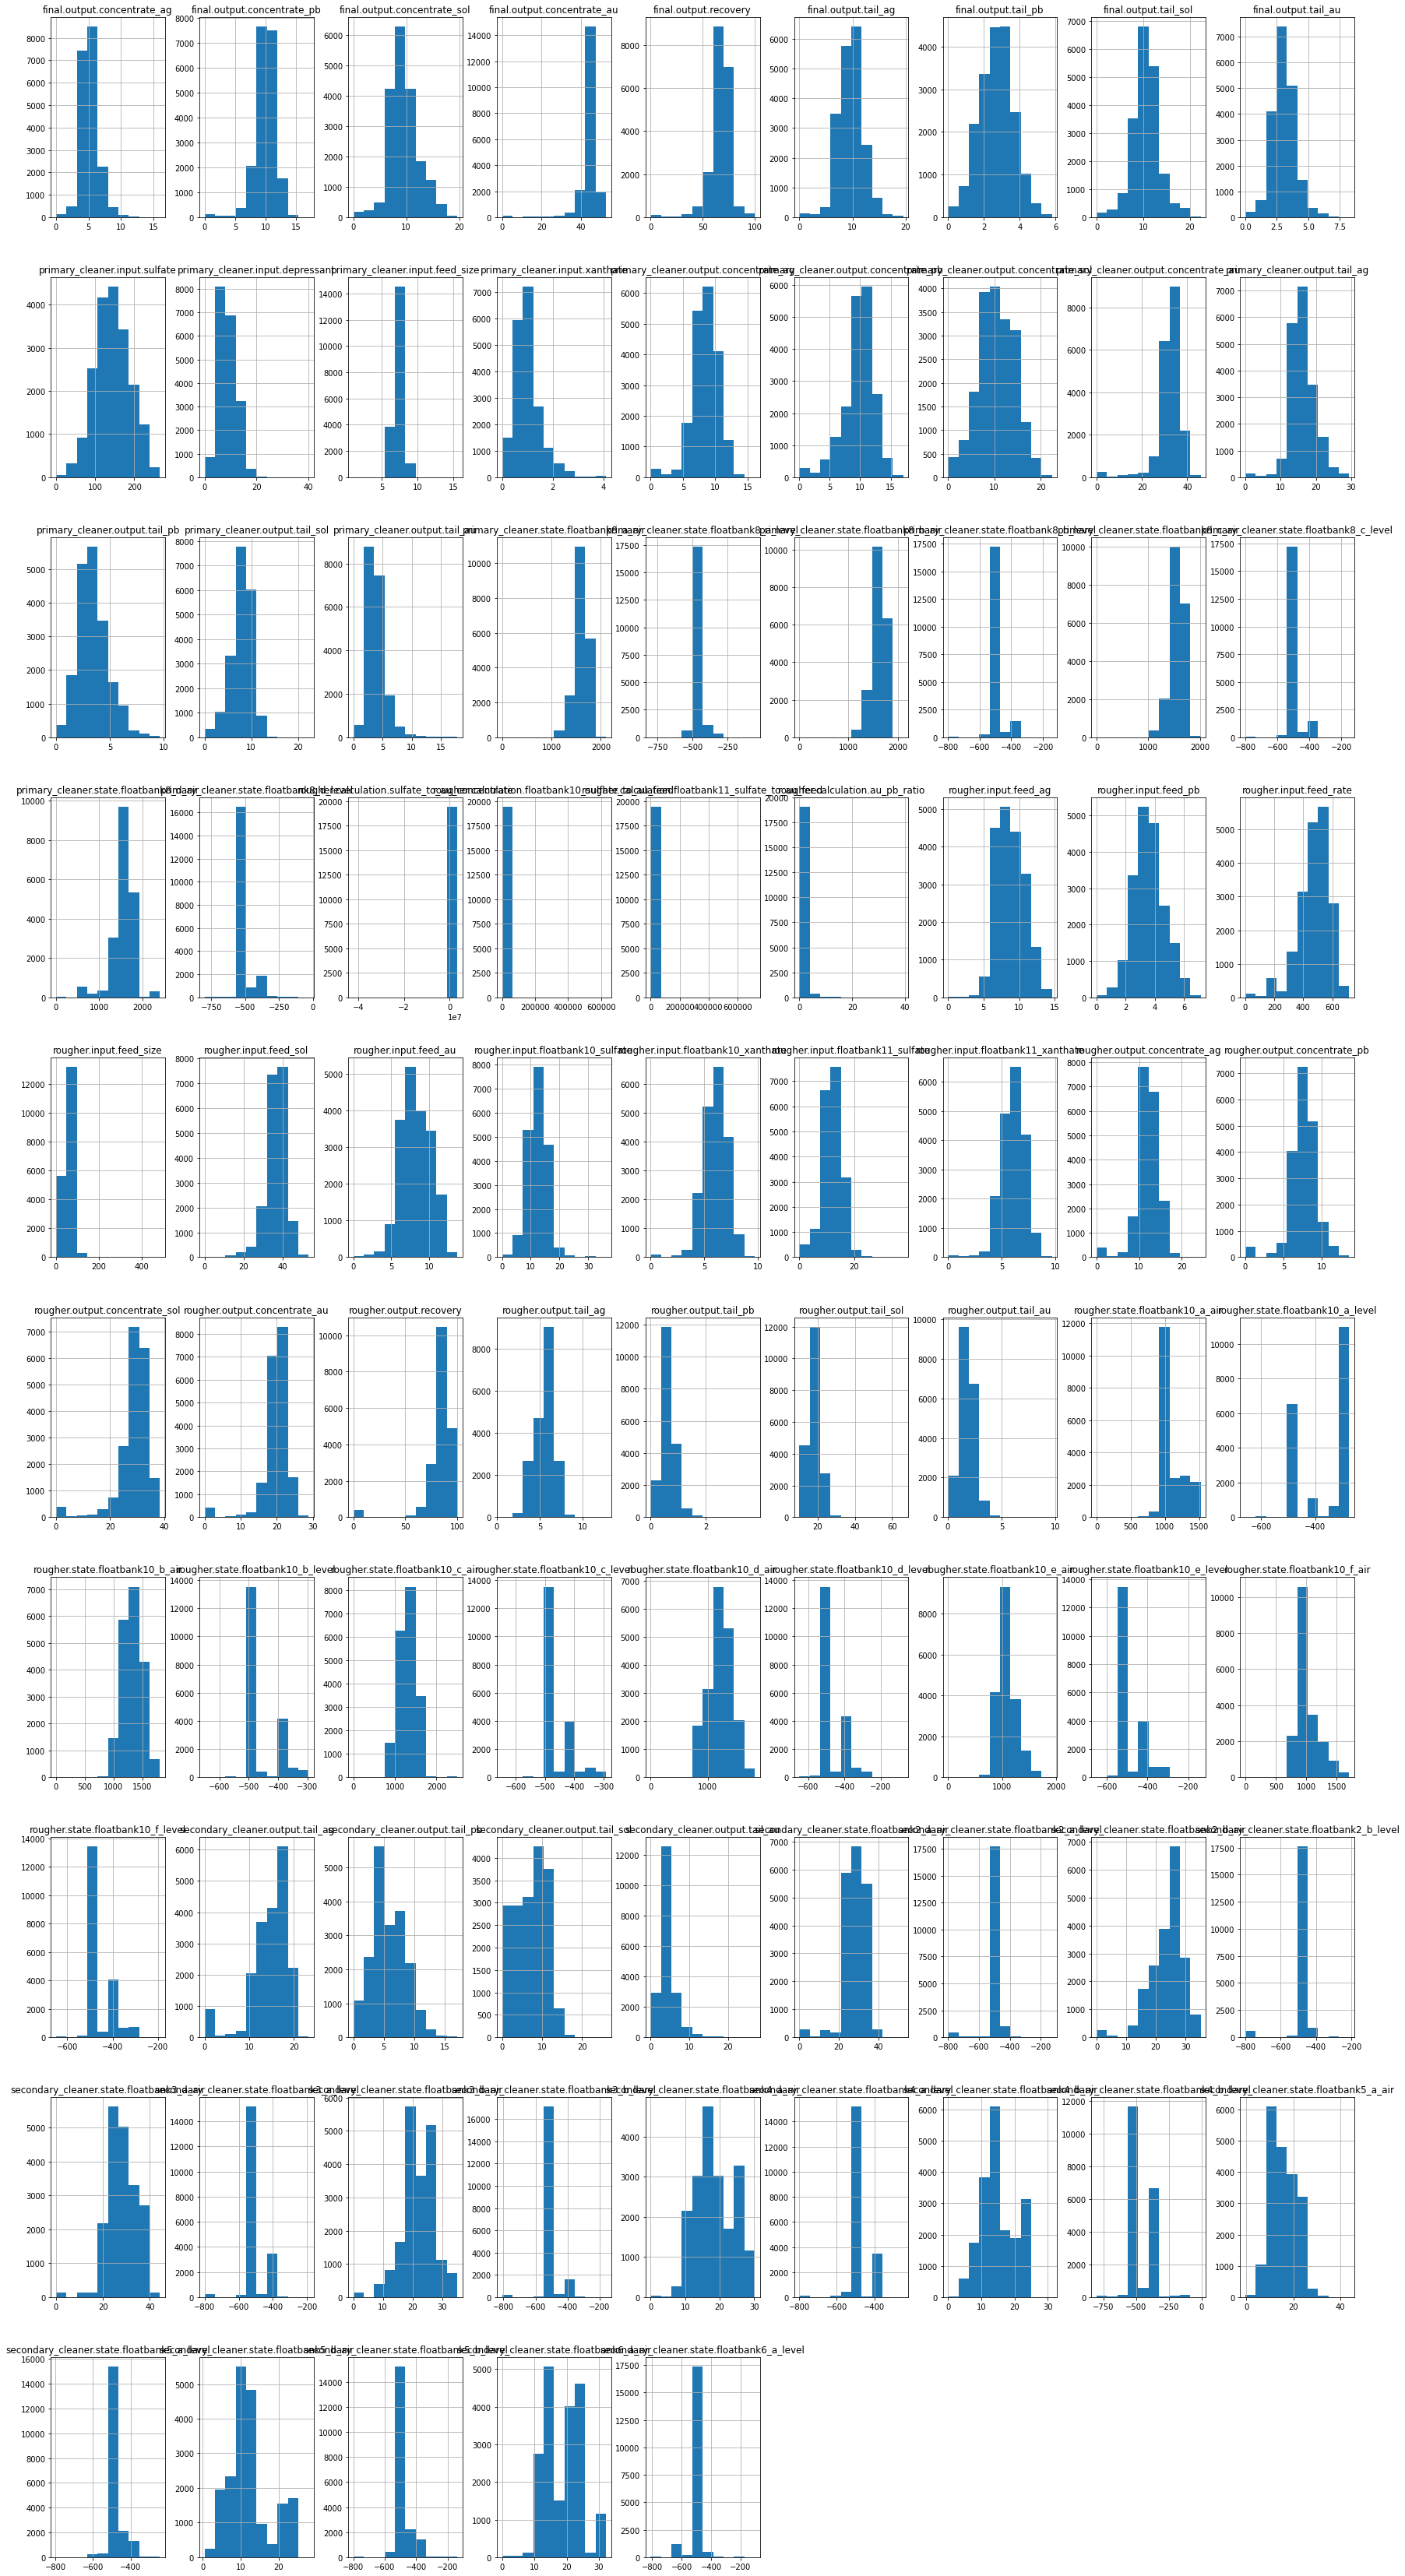

In [ ]:
display(df_full.head())
df_full.info()
df_full.hist(figsize=(30, 60));

В файле со всеми данными содержатся 19 439 записей. данные описывают 87 колонок, 86 из которых численные признаки и один содержит дату. Данные также как и обучающая выборка содержат пропуски. 

### Проверка эффективности обогощения

Эффективность обогащения рассчитывается по формуле

$Recovery = \frac{C*(F-T)}{ F*(C-T)} * 100$%

где 
* C — доля золота в концентрате после флотации/очистки;
* F — доля золота в сырье/концентрате до флотации/очистки;
* T — доля золота в отвальных хвостах после флотации/очистки.

In [ ]:
#функция для определения эффективности обогащения
def recovery(c,f,t):
    result = (c * (f - t)) / (f * (c - t)) * 100
    return result

In [ ]:
#выделим необходимы доли золота из обучающей выборки
c_train = df_train['rougher.output.concentrate_au']
f_train = df_train['rougher.input.feed_au']
t_train = df_train['rougher.output.tail_au']

In [ ]:
print(recovery(c_train,f_train,t_train).median())
df_train['rougher.output.recovery'].median()

85.29946209869779


85.2994620986978

Эффективность расчитана верно. Расчитанное медианное начение совпадает со значением признака. Для полной достоверности найдем MAE.

In [ ]:
df_train['rougher.output.recovery'].describe()

count    14149.000000
mean        82.704502
std         14.479156
min          0.000000
25%         79.993067
50%         85.299462
75%         90.165021
max        100.000000
Name: rougher.output.recovery, dtype: float64

In [ ]:
recovery(c_train,f_train,t_train).describe()

count    14149.000000
mean        82.704502
std         14.479156
min         -0.000000
25%         79.993067
50%         85.299462
75%         90.165021
max        100.000000
dtype: float64

In [ ]:
print(mean_absolute_error(df_train['rougher.output.recovery'],recovery(c_train,f_train,t_train)))
print(mean_absolute_percentage_error(df_train['rougher.output.recovery'],recovery(c_train,f_train,t_train)))

9.73512347450521e-15
1.1598012478556472e-16


Средняя абсолютная ошибка стремится к нулю. Следовательно значение расчитано правильно.

### Анализ признаков недоступных в тестовой выборке

Согласно условию задачи некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей.

Найдем их, представив признаки из обучающей и тестовой выборок в качестве множеств.

In [ ]:
columns_train = df_train.columns
columns_test = df_test.columns
columns_left = list(set(columns_train) - set(columns_test))
columns_left.sort()
columns_left

['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

В тестовой выборке отсутствуют те признаки, которые описывают выходные концентрации веществ каждого этапа, т.к. заранее их знать невозможно.

### Предобработка данных

#### Работа с пропусками

Проверим пропуски в тестовой и обучающих выборках.

In [ ]:
df_train.isna().sum()

date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64

In [ ]:
#как уже было сказано выше, все пропуски необходимо удалить
df_train = df_train.dropna(axis='index', how='any')
df_train.isna().sum()

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64

In [ ]:
df_train.isna().sum()
df_test = df_test.dropna(axis='index', how='any')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5229 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5229 non-null   object 
 1   primary_cleaner.input.sulfate               5229 non-null   float64
 2   primary_cleaner.input.depressant            5229 non-null   float64
 3   primary_cleaner.input.feed_size             5229 non-null   float64
 4   primary_cleaner.input.xanthate              5229 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5229 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5229 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5229 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5229 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5229 non-null   float64
 10  primary_clea

#### Работа с дубликатами

Проверим есть ли в данных полные дубли. На неполные дубликаты числовые данные проверять нет смысла.

In [ ]:
df_train.duplicated().sum()

0

Дубликатов в данных нет

**Вывод:** были изучены файлы, проверена эффективность обогощения для rougher.output.recovery, проанализированы признаки, которых нет в тестовой выборке и проведена предобработка данных.

## Анализ данных

### Концентрация металлов на различных этапах очистки

In [ ]:
rougher_output = pd.DataFrame()
rougher_output['pb'] = df_train['rougher.output.concentrate_pb']
rougher_output['au'] = df_train['rougher.output.concentrate_au']
rougher_output['ag'] = df_train['rougher.output.concentrate_ag']
#sns.catplot(kind="boxen", data=rougher_output, palette='husl', height=8)

final_output = pd.DataFrame()
final_output['pb'] = df_train['final.output.concentrate_pb']
final_output['au'] = df_train['final.output.concentrate_au']
final_output['ag'] = df_train['final.output.concentrate_ag']
#sns.catplot(kind="boxen", data=final_output, palette='husl', height=8)

primary_cleaner_output = pd.DataFrame()
primary_cleaner_output['pb'] = df_train['primary_cleaner.output.concentrate_pb']
primary_cleaner_output['au'] = df_train['primary_cleaner.output.concentrate_au']
primary_cleaner_output['ag'] = df_train['primary_cleaner.output.concentrate_ag']
#sns.catplot(kind="boxen", data=primary_cleaner_output, palette='husl', height=8)

rougher_feed = pd.DataFrame()
rougher_feed['pb'] = df_train['rougher.input.feed_pb']
rougher_feed['au'] = df_train['rougher.input.feed_au']
rougher_feed['ag'] = df_train['rougher.input.feed_ag']

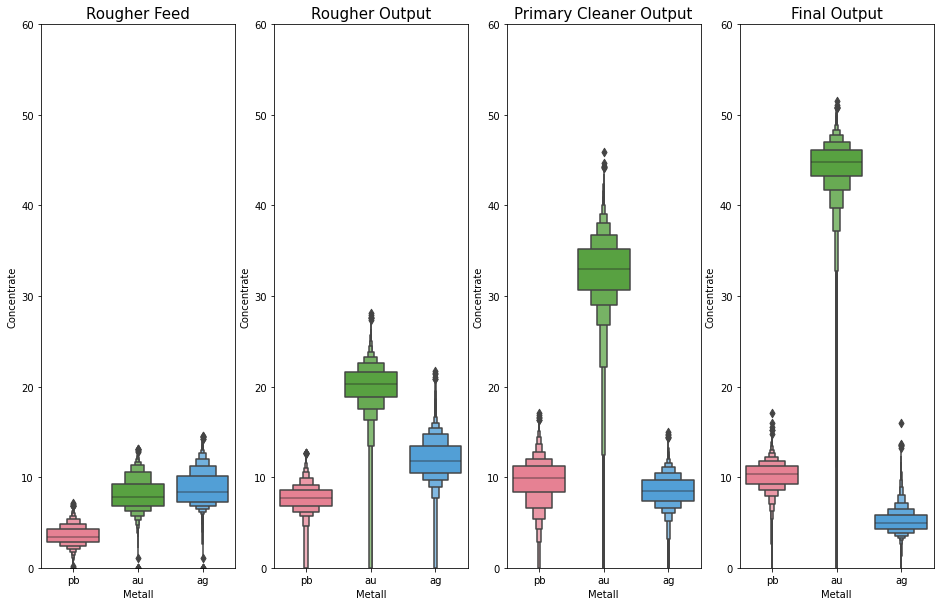

In [ ]:
fig = plt.figure()

ax_1 = fig.add_subplot(1, 4, 1)
ax_2 = fig.add_subplot(1, 4, 2)
ax_3 = fig.add_subplot(1, 4, 3)
ax_4 = fig.add_subplot(1, 4, 4)

#sns.catplot(kind="boxen", data=rougher_output, palette='husl', height=8, ax=ax_1)
sns.boxenplot(data=rougher_feed, palette='husl', ax=ax_1).set(ylim=(0, 60))
sns.boxenplot(data=rougher_output, palette='husl', ax=ax_2).set(ylim=(0, 60))
sns.boxenplot(data=primary_cleaner_output, palette='husl', ax=ax_3).set(ylim=(0, 60))
sns.boxenplot(data=final_output, palette='husl', ax=ax_4).set(ylim=(0, 60))

ax_1.set_title('Rougher Feed',
               fontsize=15)
ax_2.set_title('Rougher Output',
               fontsize=15)
ax_3.set_title('Primary Cleaner Output',
               fontsize=15)
ax_4.set_title('Final Output',
               fontsize=15)

ax_1.set_xlabel('Metall')
ax_1.set_ylabel('Concentrate')
ax_2.set_xlabel('Metall')
ax_2.set_ylabel('Concentrate')
ax_3.set_xlabel('Metall')
ax_3.set_ylabel('Concentrate')
ax_4.set_xlabel('Metall')
ax_4.set_ylabel('Concentrate')

fig.set_figwidth(16)
fig.set_figheight(10)

plt.show()

**Вывод:** 
Из графиков видно, что концентрация золото в смеси после разных этапов очистки постепенно возрастает. Так, например, после флотации концентрация золота увеличивается сразу примерно в 2 раза. Концентрация серебра хоть и увеличивается после флотации, но в финальном концентрате ее становится меньше, чем в сырье. Концентрация свинца хоть и так же увеличивается после флотации, но зтем его концентрация не сильно меняется.

Также на графиках видны аномалии: значения концентрации металлов не может быть равно 0, это означает неисправность датчиков. Данные значения необходимо удалить.

In [ ]:
df_train = df_train[(df_train['rougher.output.concentrate_pb'] != 0) & (df_train['rougher.output.concentrate_au'] != 0) 
                   & (df_train['rougher.output.concentrate_ag'] != 0) & (df_train['final.output.concentrate_pb'] != 0)
                   & (df_train['final.output.concentrate_au'] != 0) & (df_train['final.output.concentrate_ag'] != 0)
                   & (df_train['primary_cleaner.output.concentrate_pb'] != 0) & (df_train['primary_cleaner.output.concentrate_au'] != 0)
                   & (df_train['primary_cleaner.output.concentrate_ag'] != 0)]

### Сравнения распределения размеров гранул сырья на обучающей и тестовой выборках

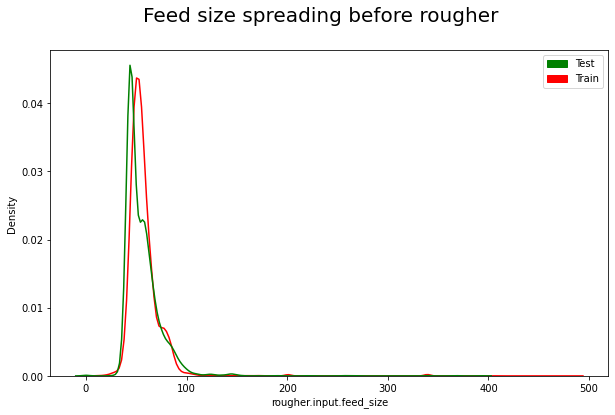

In [ ]:
fig = plt.figure()

sns.kdeplot(x="rougher.input.feed_size", data=df_train, color='red')
sns.kdeplot(x="rougher.input.feed_size",  data=df_test, color='green')

fig.set_figwidth(10)
fig.set_figheight(6)


name_to_color = {
    'Test':   'green',
    'Train':   'red',
}

patches = [matplotlib.patches.Patch(color=v, label=k) for k,v in name_to_color.items()]
matplotlib.pyplot.legend(handles=patches)

fig.suptitle('Feed size spreading before rougher', fontsize = 20)

plt.show()

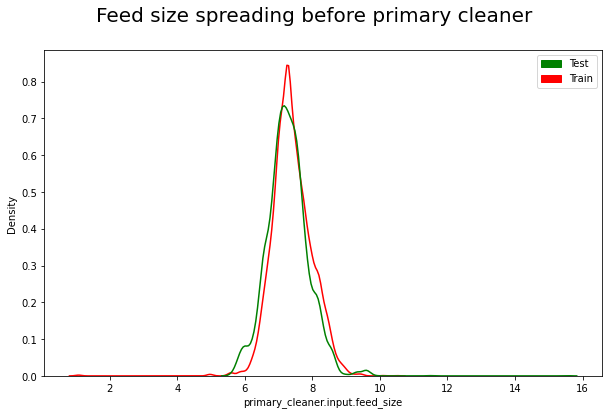

In [ ]:
fig = plt.figure()

sns.kdeplot(x="primary_cleaner.input.feed_size", data=df_train, color='red')
sns.kdeplot(x="primary_cleaner.input.feed_size",  data=df_test, color='green')

name_to_color = {
    'Test':   'green',
    'Train':   'red',
}

patches = [matplotlib.patches.Patch(color=v, label=k) for k,v in name_to_color.items()]
matplotlib.pyplot.legend(handles=patches)

fig.suptitle('Feed size spreading before primary cleaner', fontsize = 20)

fig.set_figwidth(10)
fig.set_figheight(6)

plt.show()

**Вывод:** Из графиков видно, что распределения размеров гранул сырья до флотации и до первичной очистки на обучающей и тестовой выборках различаются не сильно, поэтому оценка модели не пострадает. Однако, до первичной очистки размеры гранул уменьшаются, и распределения становится приближенным к нормальному.

###  Суммарная концентрация всех веществ на разных стадиях

In [ ]:
#Сырье
rougher_input = pd.DataFrame()
rougher_input['pb'] = df_train['rougher.input.feed_pb']
rougher_input['au'] = df_train['rougher.input.feed_au']
rougher_input['ag'] = df_train['rougher.input.feed_ag']
rougher_input['sol'] = df_train['rougher.input.feed_sol']
rougher_input['sum'] = rougher_input['pb'] + rougher_input['au'] + rougher_input['ag'] + rougher_input['sol']

#Финальный концентрат
final_output['pb'] = df_train['final.output.concentrate_pb']
final_output['au'] = df_train['final.output.concentrate_au']
final_output['ag'] = df_train['final.output.concentrate_ag']
final_output['sol'] = df_train['final.output.concentrate_sol']
final_output['sum'] = final_output['pb'] + final_output['au'] + final_output['ag'] + final_output['sol']

#Черновой концентрат
rougher_output['pb'] = df_train['rougher.output.concentrate_pb']
rougher_output['au'] = df_train['rougher.output.concentrate_au']
rougher_output['ag'] = df_train['rougher.output.concentrate_ag']
rougher_output['sol'] = df_train['rougher.output.concentrate_sol']
rougher_output['sum'] = rougher_output['pb'] + rougher_output['au'] + rougher_output['ag'] + rougher_output['sol']

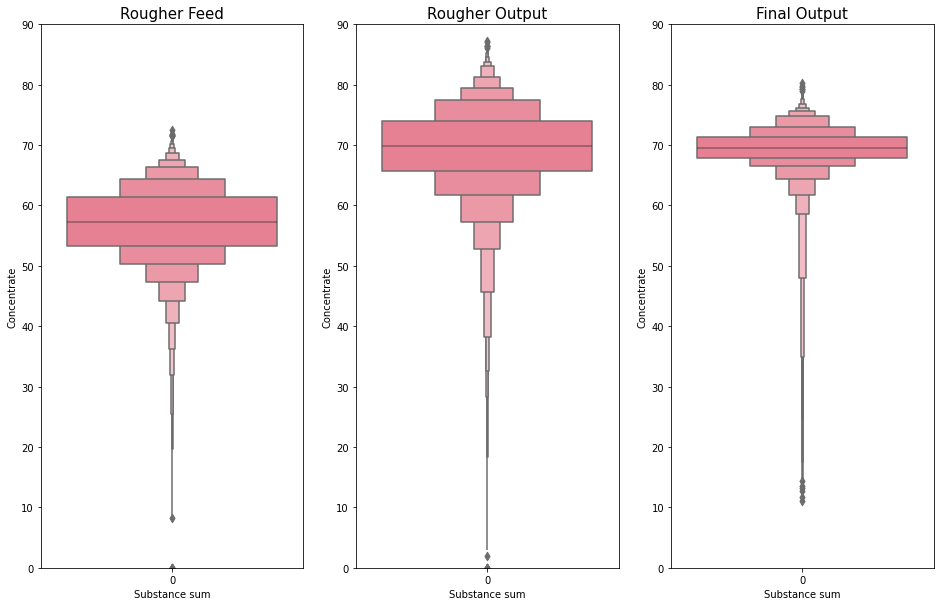

In [ ]:
fig = plt.figure()

ax_1 = fig.add_subplot(1, 3, 1)
ax_2 = fig.add_subplot(1, 3, 2)
ax_3 = fig.add_subplot(1, 3, 3)

#sns.catplot(kind="boxen", data=rougher_output, palette='husl', height=8, ax=ax_1)
sns.boxenplot(data=rougher_input['sum'], palette='husl', ax=ax_1).set(ylim=(0, 90))
sns.boxenplot(data=rougher_output['sum'], palette='husl', ax=ax_2).set(ylim=(0, 90))
sns.boxenplot(data=final_output['sum'], palette='husl', ax=ax_3).set(ylim=(0, 90))

ax_1.set_title('Rougher Feed',
               fontsize=15)
ax_2.set_title('Rougher Output',
               fontsize=15)
ax_3.set_title('Final Output',
               fontsize=15)

ax_1.set_xlabel('Substance sum')
ax_1.set_ylabel('Concentrate')
ax_2.set_xlabel('Substance sum')
ax_2.set_ylabel('Concentrate')
ax_3.set_xlabel('Substance sum')
ax_3.set_ylabel('Concentrate')

fig.set_figwidth(16)
fig.set_figheight(10)

plt.show()

Из графика видно, что суммарная концентрация всех веществ становтся больше в черновом и финальном концентрате, чем в сырье. Здесь также наблюдаются аномалии с концентрацией вещества sol. Их необходимо удалить.

In [ ]:
df_train = df_train[(df_train['rougher.input.feed_sol'] != 0) & (df_train['final.output.concentrate_sol'] != 0) 
                   & (df_train['rougher.output.concentrate_sol'] != 0)]

**Вывод:** были рассмотрены изменения концентрации металлов на различных этапах очистки, сравнены распределения размеров грануд в обучающей и тестовой выборке, исследованы суммрные концентрации всех веществ на разных стадиях.

## Модель

Напишем функцию для метрики sMAPE.

In [ ]:
def sMAPE(y_true, y_pred):
    result = (sum(abs(y_true - y_pred) / ((abs(y_true) + abs(y_pred)) / 2)) / len(y_pred)) * 100
    return result

Напишем функцию для итоговой метрики sMAPE.

In [ ]:
def total_sMAPE(rougher_true, rougher_pred, final_true, final_pred):
    result = 0.25 * sMAPE(rougher_true, rougher_pred) + 0.75 * sMAPE(final_true, final_pred)
    return result

Т.к. тестирование будущей моели должно провидиться на одинаковом количестве признаков в обучающей и тестовой выборке, оставим в обучающей выборке только те столбцы, что есть в тестовой.

In [ ]:
df_train_1 = df_train[columns_test]
display(df_train_1.head())
df_train_1.describe()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,-499.315107,1574.479259,-498.931665,6.161113,2.266033,525.290581,57.278666,35.753385,6.478583,11.971193,6.005766,11.996163,6.012594,1000.286398,-400.065196,1600.754587,-449.953435,1600.479580,-449.830646,1600.527589,-449.953649,1399.227084,-450.869848,1399.719514,-450.119001,25.880539,-499.989656,23.889530,-500.372428,23.970550,-500.085473,22.085714,-499.446897,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,-500.870069,1599.541515,-499.827444,6.116455,2.159622,530.026610,57.510649,35.971630,6.362222,11.920603,6.197377,11.920305,6.204633,999.719565,-400.074028,1599.337330,-450.008530,1599.672797,-449.954491,1599.849325,-449.954185,1399.180945,-449.937588,1400.316682,-450.527147,26.005245,-499.929616,23.886657,-499.951928,23.913535,-499.442343,23.957717,-499.901982,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,-500.727997,1600.449520,-500.052575,6.043309,2.037807,542.590390,57.792734,36.862241,6.118189,11.630094,6.203177,11.692450,6.196578,999.814770,-400.200179,1600.059442,-450.619948,1600.012842,-449.910497,1597.725177,-450.130127,1400.94315

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,10737.000000,10737.000000,10737.000000,10737.000000,10737.000000,10737.000000,10737.000000,10737.000000,10737.000000,10737.000000,10737.000000,10737.000000,10737.000000,10737.000000,10737.000000,10737.000000,10737.000000,10737.000000,10737.000000,10737.000000,10737.000000,10737.000000,10737.000000,10737.000000,10737.000000,10737.000000,10737.000000,10737.000000,10737.000000,10737.000000,10737.000000,10737.000000,10737.000000,10737.000000,10737.000000,10737.000000,10737.000000,10737.000000,10737.000000,10737.000000,10737.000000,10737.000000,10737.000000,10737.000000,10737.000000,10737.000000,10737.000000,10737.000000,10737.000000,10737.000000,10737.000000,10737.000000
mean,140.926809,9.327064,7.400668,0.893756,1606.593814,-488.451825,1608.559638,-488.746070,1606.647908,-488.859113,1542.369793,-483.218887,8.776404,3.549416,480.662973,57.334260,36.550683,8.106685,12.252287,5.880455,12.242901,5.895088,1105.954415,-381.596194,1330.553742,-463.707052,1313.894167,-464.718118,1224.432691,-465.049597,1084.197919,-464.491762,1035.854153,-464.167620,29.550301,-497.426839,24.764746,-497.523048,28.920984,-475.775913,22.608660,-486.722991,19.342683,-476.260295,15.056361,-457.061965,16.472499,-481.797600,12.766222,-481.975676,20.183334,-508.612175
std,35.980196,3.384901,0.577699,0.365333,131.890207,34.555796,133.313208,34.349707,135.636074,35.112155,284.957122,45.752701,1.882629,1.071985,89.118981,19.095036,4.603216,1.791844,2.924588,1.007528,2.934622,1.036206,163.536108,96.749031,173.032712,53.930714,203.092140,51.955979,194.542929,51.957213,180.494165,52.803286,170.114797,52.740953,5.607317,53.944081,6.122799,52.891221,5.725277,57.510943,5.146789,45.413869,5.561445,52.816816,5.403232,60.139180,5.846209,40.902594,5.871803,41.590558,5.559838,39.726168
min,14.785076,0.000000,1.080000,0.000154,1098.583955,-604.571455,1097.057339,-740.122129,1032.027675,-782.912082,523.348219,-799.788598,0.010000,0.010000,0.012786,9.659576,0.010000,0.010000,0.354784,0.125279,0.009166,0.006375,320.558797,-650.086255,379.023139,-558.967560,831.537936,-610.357519,304.093664,-640.519003,547.540324,-649.443911,695.175026,-

Выделим 2 целевых признака и разобьем обучающую выборку на обучающую и валидационную. Также уберем из признаков дату, т.к. она может помешать обучению.

In [ ]:
target_rougher_train = df_train['rougher.output.recovery']
target_final_train = df_train['final.output.recovery']
features_train = df_train_1.drop('date', axis=1)

Обучим модели: Линейная регрессия, Лассо-регрессия и Случайный лес для регрессии и оценим их качество с помощью кросс-валидации. В качестве метрики качества используем написанную выше SMAPE.

In [ ]:
#Линейная регрессия
slr = LinearRegression()
pipeline = make_pipeline(StandardScaler(), slr)
scores = cross_val_score(pipeline, features_train, target_rougher_train, cv=5, 
                         scoring=make_scorer(sMAPE, greater_is_better=False))
print('Final score for rougher:  {:.3f}'.format((scores).mean() * -1))

scores = cross_val_score(pipeline, features_train, target_final_train, cv=5, scoring=make_scorer(sMAPE, greater_is_better=False))
print('Final score for final:  {:.3f}'.format((scores).mean() * -1))

Final score for rougher:  6.158
Final score for final:  9.019


In [ ]:
#Лассо регрессия 

lasso = Lasso()
pipe = Pipeline(steps=[("scaler", StandardScaler()),("lasso",lasso)])

parametrs = { 'lasso__alpha': [0, 1.0, 10],
              'lasso__max_iter': [1000,10000]}
grid_lasso = GridSearchCV(pipe, parametrs, cv=5, scoring=make_scorer(sMAPE, greater_is_better=False), n_jobs=2)
grid_lasso.fit(features_train, target_rougher_train)
print(grid_lasso.best_params_)
print(grid_lasso.best_score_)


grid_lasso.fit(features_train, target_final_train)
print(grid_lasso.best_params_)
print(grid_lasso.best_score_)

/opt/conda/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.9/site-packages/s

{'lasso__alpha': 0, 'lasso__max_iter': 10000}
-6.158304847983051


/opt/conda/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/opt/conda/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.9/site-packages/s

{'lasso__alpha': 1.0, 'lasso__max_iter': 1000}
-8.257220467032184


In [ ]:
rfr = RandomForestRegressor(random_state=12345)
parametrs = { 'n_estimators': [30, 40, 50],
              'max_depth': [1,3,5]}
grid_rfr = GridSearchCV(rfr, parametrs, cv=5, scoring=make_scorer(sMAPE, greater_is_better=False), n_jobs=2)
grid_rfr.fit(features_train, target_rougher_train)
print(grid_rfr.best_params_)
print(grid_rfr.best_score_)


grid_rfr.fit(features_train, target_final_train)
print(grid_rfr.best_params_)
print(grid_rfr.best_score_)

{'max_depth': 5, 'n_estimators': 50}
-5.6809247516504495
{'max_depth': 1, 'n_estimators': 50}
-8.156543458712349


Лучшая (наименьшая) метрика sMAPE у модели Случайного леса для регрессии. Проверим ее метрики на валидационной выборке, затем обучим модель на тестовой выборке и найдем с помощью нее итоговую sMAPE.

Перед тестированием необходимо получить целевые признаки для тестовой модели из общей выборки.

In [ ]:
#сопоставим признаки по дате
df_test = df_test.merge(df_full[['date','rougher.output.recovery', 'final.output.recovery']], on='date')
df_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,89.993421,70.273583
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,88.089657,68.910432
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,88.412756,68.143213
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.5

Выделим целевые признаки

In [ ]:
target_rougher_test = df_test['rougher.output.recovery']
target_final_test = df_test['final.output.recovery']
features_test = df_test.drop(['date','final.output.recovery','rougher.output.recovery'], axis=1)

Обучим модель

In [ ]:
rfr = RandomForestRegressor(random_state=12345, max_depth=5, n_estimators=50)
rfr.fit(features_train, target_rougher_train)
predicted_rougher = rfr.predict(features_test)

rfr = RandomForestRegressor(random_state=12345, max_depth=1, n_estimators=50)
rfr.fit(features_train, target_final_train)
predicted_final = rfr.predict(features_test)

Итоговая метрика

In [ ]:
total_sMAPE(target_rougher_test, predicted_rougher, target_final_test, predicted_final)

9.088251464035327

In [ ]:
model_dummy_regressor = DummyRegressor()
model_dummy_regressor.fit(features_train, target_rougher_train)
predictions_test_dummy = model_dummy_regressor.predict(features_test)
print("Тестовая выборка для сырья:", sMAPE(target_rougher_test, predictions_test_dummy))

model_dummy_regressor.fit(features_train,target_final_train)
predictions_test_dummy = model_dummy_regressor.predict(features_test)
print("Тестовая выборка для сырья:", sMAPE(target_final_test, predictions_test_dummy))

Тестовая выборка для сырья: 9.055387620506378
Тестовая выборка для сырья: 9.430280418607804


**Вывод:** была написана функця для вычисления итоговой метрики, обучено несколько моделей, из которых выбрана лучшая. Она была проестирована на тестовой выборке.

Модель проверена на адекватность. Модель показала меньшие показатели sMAPE, чем простейшая.

## Вывод

В данном проекте было необходимо подготовить прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий. Модель должна предсказывать коэффициент восстановления золота из золотосодержащей руды, что должно оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками. Использовались данные с параметрами добычи и очистки. 

1. Были изучены файлы, проверена эффективность обогощения для rougher.output.recovery, проанализированы признаки, которых нет в тестовой выборке и проведена предобработка данных.

В файле с обучающей выборкой содержатся чуть больше 14 000 записей вместе с целевым признаком. Их описывают 87 колонок, 86 из которых численные признаки и один содержит дату. В данных содержались пропуски. Так как они представляют незначительную часть от общего размера данных, во избежания ошибок при попытке их заполнения пропуски были удалены.

В файле с тестовой выборкой содержатся почти 5 300 записей без целевого признака, который в дальнейшем был восстановлен из общего файла. Данные описывают 53 колонки, 52 из которых численные признаки и один содержит дату. Данные также как и обучающая выборка содержали пропуски, которые были удалены.

В файле со всеми данными содержатся 19 439 записей. Данные описывают 87 колонок, 86 из которых численные признаки и один содержит дату. В данных также есть пропуски, которые были удалены.

Проверенна эффективность, она расчитана верно. Расчитанное медианное начение совпадает со значением признака. Средняя абсолютная ошибка (9.73e-15) отклонение стремится к нулю.

Согласно условию задачи некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Это те признаки, которые описывают выходные концентрации веществ каждого этапа, т.к. заранее их знать невозможно.

2. Были рассмотрены изменения концентрации металлов на различных этапах очистки, сравнены распределения размеров грануд в обучающей и тестовой выборке, исследованы суммрные концентрации всех веществ на разных стадиях.

Концентрация золото в смеси после разных этапов очистки постепенно возрастает. Так, например, после флотации концентрация золота увеличивается сразу примерно в 2 раза. Концентрация серебра хоть и увеличивается после флотации, но в финальном концентрате ее становится меньше, чем в сырье. Концентрация свинца хоть и так же увеличивается после флотации, но зтем его концентрация не сильно меняется.

Были обнаружены аномалии: значения концентрации металлов не может быть равно 0, это означает неисправность датчиков. Данные значения были удалены.

распределения размеров гранул сырья до флотации и до первичной очистки на обучающей и тестовой выборках различаются не сильно, поэтому оценка модели не пострадает. Однако, до первичной очистки размеры гранул уменьшаются, и распределения становится приближенным к нормальному.

Суммарная концентрация всех веществ становтся больше в черновом и финальном концентрате, чем в сырье. Здесь также наблюдаются аномалии с концентрацией вещества sol. Они были удалены.

3. Была написана функця для вычисления итоговой метрики, обучено несколько моделей, из которых выбрана лучшая. Она была проестирована на тестовой выборке.

Т.к. тестирование будущей моели должно провидиться на одинаковом количестве признаков в обучающей и тестовой выборке, в обучающей выборке остались только те столбцы, что есть в тестовой.

Обучим модели: Линейная регрессия, Лассо-регрессия и Случайный лес для регрессии и оценим их качество с помощью кросс-валидации. В качестве метрики качества используем написанную выше SMAPE.

Итоговые модели линейной регресии:
* для сырья:  6.158
* для финального концентрата:  9.019

Итоговые оценки для лассо-регрессии:
* для сырья:  6.158
* для финального концентрата:  8.252

Итоговые оценки для случайного леса:
* для сырья:  5.681
* для финального концентрата:  8.156

Модель случайного леса была обучена на тестовой выборке и с ее помощью нашли итоговую sMAPE = 9.088.

Таким образом, была обучена модель, которая предсказывает коэффициент восстановления золота из золотосодержащей руды